In [2]:
## all imports
from IPython.display import HTML
import numpy as np

import bs4 #this is beautiful soup
import time
import operator
import socket
import pickle
import re # regular expressions
import datetime as dt
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf

from urllib.request import *
from pandas import Series
import pandas as pd
from pandas import DataFrame


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
#signin plotly api
plotly.tools.set_credentials_file(username='stanleychris2', api_key='ku12fuc31h')

NameError: name 'plotly' is not defined

In [3]:
companies = pd.read_csv('companies.csv')

In [4]:
companies.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/bratpackstyle-llc,"#BratPackStyle, LLC.",http://www.bratpackstyle.com,|Lifestyle|Content Discovery|Social Commerce|R...,Social Commerce,0,operating,USA,NY,New York City,New York,1,2015-04-19,2015-06-01,2015-06-01
1,/organization/-fame,#fame,http://livfame.com,|Media|,Media,10000000,operating,IND,NaN,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
2,/organization/hashoff,#HASHOFF,http://www.hashoff.com,|Digital Media|Internet|Social Media|,Digital Media,955000,operating,USA,CO,Denver,Denver,2,2014-04-01,2014-12-08,2015-08-11
3,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1,2012-06-01,2012-06-30,2012-06-30
4,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,2010-06-04,2010-09-23


In [5]:
grouped_cities = companies['first_funding_at'].groupby(companies['region'])
cities = grouped_cities.count().sort_values(ascending = False)

In [6]:
other = sum(cities[15:])
otherseries = pd.Series(other)
cities15 = cities[:14]

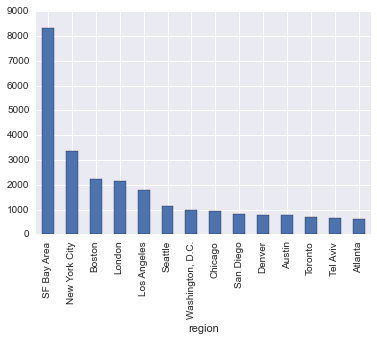

In [7]:
cities15.plot(kind='bar')

In [8]:
companies2005 = companies[(companies.first_funding_at >= '2005-01-01') &
                          (companies.first_funding_at <= '2006-01-01')]
companies2006 = companies[(companies.first_funding_at >= '2006-01-01') & 
                          (companies.first_funding_at <= '2007-01-01')]
companies2007 = companies[(companies.first_funding_at >= '2007-01-01') & 
                          (companies.first_funding_at <= '2008-01-01')]
companies2008 = companies[(companies.first_funding_at >= '2008-01-01') & 
                          (companies.first_funding_at <= '2009-01-01')]
companies2009 = companies[(companies.first_funding_at >= '2009-01-01') & 
                          (companies.first_funding_at <= '2010-01-01')]
companies2010 = companies[(companies.first_funding_at >= '2010-01-01') & 
                          (companies.first_funding_at <= '2011-01-01')]
companies2011 = companies[(companies.first_funding_at >= '2011-01-01') & 
                          (companies.first_funding_at <= '2012-01-01')]
companies2012 = companies[(companies.first_funding_at >= '2012-01-01') & 
                          (companies.first_funding_at <= '2013-01-01')]
companies2013 = companies[(companies.first_funding_at >= '2013-01-01') & 
                          (companies.first_funding_at <= '2014-01-01')]
companies2014 = companies[(companies.first_funding_at >= '2014-01-01') & 
                          (companies.first_funding_at <= '2015-01-01')]
companies2015 = companies[(companies.first_funding_at >= '2015-01-01') & 
                          (companies.first_funding_at <= '2016-01-01')]

#print(companies2005.region.count())
#companies_2005_count = companies2005.region.count()
companies_2005_regions = companies2005['first_funding_at'].groupby(companies2005['region'])
regions_2005 = companies_2005_regions.count().sort_values(ascending = False)

companies_2006_regions = companies2006['first_funding_at'].groupby(companies2006['region'])
regions_2006 = companies_2006_regions.count().sort_values(ascending = False)

In [9]:
data = {
        '2014': companies2014.region.value_counts(),
        '2013': companies2013.region.value_counts(),
        '2012': companies2012.region.value_counts(),
        '2011': companies2011.region.value_counts(),
        '2010': companies2010.region.value_counts(),
        '2009': companies2009.region.value_counts(),
        '2008': companies2008.region.value_counts(),
        '2007': companies2007.region.value_counts(),
        '2006': companies2006.region.value_counts(),
        '2005': companies2005.region.value_counts(),
       }
c = pd.DataFrame(data)
top = c.reindex(["SF Bay Area", "New York City", "Boston", "London", "Los Angeles", "Seattle", "Washington, D.C.", "Chicago", 
           "San Diego", "Denver"])
top

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
SF Bay Area,364,495,622,526,629,728,1003,1076,1206,1267
New York City,58,110,159,153,223,321,425,467,583,660
Boston,88,104,112,114,231,249,262,250,269,236
London,53,90,110,116,116,153,233,292,427,462
Los Angeles,38,56,83,105,135,165,206,252,262,362
Seattle,52,43,68,68,112,126,117,126,163,156
"Washington, D.C.",53,38,41,42,78,97,110,121,157,160
Chicago,14,17,25,32,56,89,104,161,151,172
San Diego,28,37,44,33,115,90,86,86,98,143
Denver,25,28,32,47,78,86,97,96,93,144


In [10]:
top = top.T

In [11]:
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

In [12]:
top.iplot(filename="Companies_Per_Region_Since_2005")